# Telecom Churn Case Study

### Problem Statement:  
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.  
  
For many incumbent operators, retaining high profitable customers is the number one business goal.  
  
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.  
  
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.  
  
Types of Customers:-  
1. Postpaid: Customer inform beforehand  
2. Prepaid: Customer stop using services and it is difficult to know whether someone has churned or has temporarily stopped using services  
  
Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  

## Approach  
Based on the business problem and looking at the dataset at a high level, below steps will be followed to solve the case study problem :-  

1. Data Understanding and Exploration
2. Data Cleaning
3. Data Preparation
4. EDA
5. Data Preprocessing
6. Model building and Evaluation  
    i.   Logistic Regression with RFE  
    ii.  Logistic Regression with PCA  
    iii. Logistic Regression with PCA + Hyperparameter tuning  
    iv.  Decision Tree with Lasso Regression    
    v.   Decision Tree with Lasso Regression + Hyperparameter tuning    
    vi.  Random Forest with Lasso Regression   
    vii. Random Forest with Lasso Regression + Hyperparameter tuning  
7. Model Metrics Table
8. Final Analysis and Outcome
9. Top Predictors or Features
10. Recommendation

In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# display max rows and columns
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
pd.set_option('display.max_colwidth', -1)

### Data Understanding

In [3]:
# importing data dictionary
churn_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
churn_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [4]:
# loading the telecom data
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [6]:
churn.shape

(99999, 226)

In [7]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# checking unique value to understand numerucal and categorical spread
churn.nunique()

mobile_number               99999
circle_id                   1    
loc_og_t2o_mou              1    
std_og_t2o_mou              1    
loc_ic_t2o_mou              1    
last_date_of_month_6        1    
last_date_of_month_7        1    
last_date_of_month_8        1    
last_date_of_month_9        1    
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6               6512 
roam_ic_mou_7               5230 
roam_ic_mou_8               5315 
roam_ic_mou_9               4827 
roam_og_mou_6               8038 
roam_og_mou_7               6639 
roam_og_mou_8               6504 
roam_og_mou_9               5882 
loc_og_t2t_mou

### Treating Categorical Variables   
There are 8 cloumns which seems categorical in nature based on unique value and the missing values can be imputed with a new category '-1'
  
Observed Categorical Variables:  
  
night_pck_user_6
night_pck_user_7
night_pck_user_8
night_pck_user_9
fb_user_6
fb_user_7
fb_user_8
fb_user_9

In [9]:
# Missing values can be imputed with '-1',where -1 can be treated as a new category.
cat_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "fb_user_6", 
                    "fb_user_7", "fb_user_8", "fb_user_9"]

for var in cat_vars:
    churn[var].fillna(value=-1, inplace=True)

In [10]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(churn['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(churn['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(churn['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(churn['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(churn['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(churn['fb_user_8'],prefix="fb8",drop_first=True)

churn = pd.concat([churn,night_pck_user_6_s],axis=1)
churn = pd.concat([churn,night_pck_user_7_s],axis=1)
churn = pd.concat([churn,night_pck_user_8_s],axis=1)

churn = pd.concat([churn,fb_user_6_s],axis=1)
churn = pd.concat([churn,fb_user_7_s],axis=1)
churn = pd.concat([churn,fb_user_8_s],axis=1)

# drop all categorial columns
churn = churn.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [11]:
churn.shape

(99999, 232)

### Missing Value Check & Treatment

In [12]:
# column wise missing value
churn.isnull().sum()

mobile_number               0    
circle_id                   0    
loc_og_t2o_mou              1018 
std_og_t2o_mou              1018 
loc_ic_t2o_mou              1018 
last_date_of_month_6        0    
last_date_of_month_7        601  
last_date_of_month_8        1100 
last_date_of_month_9        1659 
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
arpu_9                      0    
onnet_mou_6                 3937 
onnet_mou_7                 3859 
onnet_mou_8                 5378 
onnet_mou_9                 7745 
offnet_mou_6                3937 
offnet_mou_7                3859 
offnet_mou_8                5378 
offnet_mou_9                7745 
roam_ic_mou_6               3937 
roam_ic_mou_7               3859 
roam_ic_mou_8               5378 
roam_ic_mou_9               7745 
roam_og_mou_6               3937 
roam_og_mou_7               3859 
roam_og_mou_8               5378 
roam_og_mou_9               7745 
loc_og_t2t_mou

In [13]:
# col wise missing value percentage
round((churn.isna().sum()*100/churn.shape[0]),2).sort_values(ascending=False)

arpu_3g_6                   74.85
total_rech_data_6           74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
max_rech_data_7             74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
total_rech_data_7           74.43
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
date_of_last_rech_data_9    74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
count_rech_2g_8             73.66
arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
arpu_3g_8                   73.66
av_rech_amt_data_8          73.66
total_rech_dat

In [14]:
missing_value = round(100*(churn.isnull().sum()/len(churn.index)), 2)
missing_value[missing_value >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

total recharge and average recharge will be used to filter highvalue customer. Average revenue per user can be a good predictor Hence, these columns cannot be dropped. Let's analyze to impute the missing values

In [15]:
# function to plot data distribution
def col_analysis(features, rows, cols):
    fig=plt.figure(figsize=(20,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(churn[feature],kde=False)
        plt.xticks(rotation = 90)
        ax.set_title("Plot for " + feature,color='blue')
       
    fig.tight_layout()  
    plt.show()

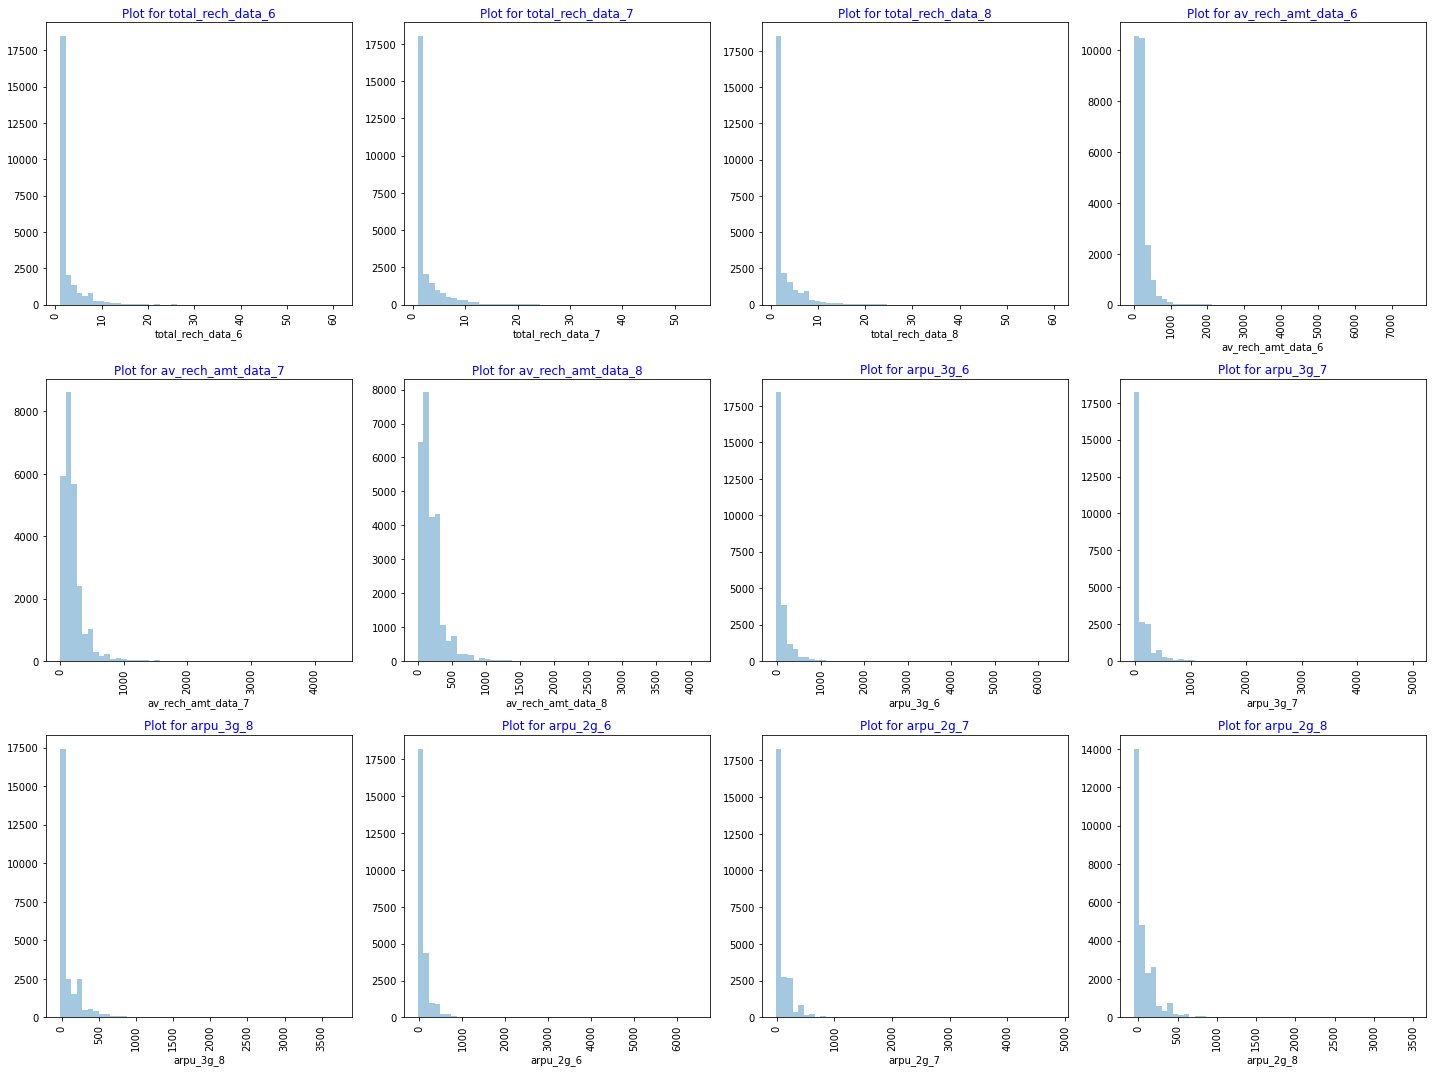

In [16]:
col_list = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7',
            'av_rech_amt_data_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
col_analysis = col_analysis(col_list,3,4)

In [17]:
# missing shows no recharge was done so, we can replace it with zero

churn.total_rech_data_6.fillna(value=0, inplace=True)
churn.total_rech_data_7.fillna(value=0, inplace=True)
churn.total_rech_data_8.fillna(value=0, inplace=True)
churn.total_rech_data_9.fillna(value=0, inplace=True)

churn.av_rech_amt_data_6.fillna(value=0, inplace=True)
churn.av_rech_amt_data_7.fillna(value=0, inplace=True)
churn.av_rech_amt_data_8.fillna(value=0, inplace=True)
churn.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [18]:
# missing shows no recharge was done so, we can replace it with zero

churn.arpu_2g_6.fillna(value=0, inplace=True)
churn.arpu_2g_7.fillna(value=0, inplace=True)
churn.arpu_2g_8.fillna(value=0, inplace=True)
churn.arpu_2g_9.fillna(value=0, inplace=True)

churn.arpu_3g_6.fillna(value=0, inplace=True)
churn.arpu_3g_7.fillna(value=0, inplace=True)
churn.arpu_3g_8.fillna(value=0, inplace=True)
churn.arpu_3g_9.fillna(value=0, inplace=True)

In [19]:
missing_value = round(100*(churn.isnull().sum()/len(churn.index)), 2)
missing_value[missing_value >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
dtype: float64

In [20]:
drop_miss_col = missing_value[missing_value > 70].index
len(drop_miss_col)

16

In [21]:
churn.drop(drop_miss_col, axis=1, inplace=True)
churn.shape

(99999, 216)

In [22]:
missing_value = round(100*(churn.isnull().sum()/len(churn.index)), 2)
missing_value[missing_value > 0]

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou

From the above plot and stats table we can observe that the range is huge. Hence, we can't go with mean, median or mode as they can skew/distort the whole scenario. Also, it's clearly evident from the above table that most of the missing values are from mobile data or recharge related.  

In [23]:
unique_count = pd.DataFrame(churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'unique'})
unique_count[unique_count['unique'] == 1]

,feature,unique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
8,last_date_of_month_9,1
61,std_og_t2c_mou_6,1
62,std_og_t2c_mou_7,1


In [24]:
# Above 16 features has single unique values so it will not help us in analysis. hence, dropping such columns
churn = churn.drop(columns = list(unique_count[unique_count['unique'] == 1]['feature']))
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.0,968,30.4,0.0,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0

In [25]:
churn.shape

(99999, 200)

In [26]:
round((churn.isna().sum()*100/churn.shape[0]),2).sort_values(ascending=False)

loc_ic_t2m_mou_9       7.75
roam_ic_mou_9          7.75
loc_og_mou_9           7.75
std_og_t2m_mou_9       7.75
loc_og_t2c_mou_9       7.75
std_og_t2f_mou_9       7.75
std_og_mou_9           7.75
loc_og_t2f_mou_9       7.75
isd_og_mou_9           7.75
loc_og_t2m_mou_9       7.75
spl_og_mou_9           7.75
og_others_9            7.75
loc_og_t2t_mou_9       7.75
ic_others_9            7.75
isd_ic_mou_9           7.75
spl_ic_mou_9           7.75
roam_og_mou_9          7.75
std_og_t2t_mou_9       7.75
std_ic_t2t_mou_9       7.75
loc_ic_t2t_mou_9       7.75
std_ic_mou_9           7.75
loc_ic_t2f_mou_9       7.75
offnet_mou_9           7.75
std_ic_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
onnet_mou_9            7.75
loc_ic_mou_9           7.75
loc_ic_t2f_mou_8       5.38
std_og_t2m_mou_8       5.38
std_og_t2f_mou_8       5.38
loc_ic_mou_8           5.38
std_og_mou_8           5.38
std_ic_t2t_mou_8       5.38
loc_ic_t2t_mou_8       5.38
loc_ic_t2m_mou_8       5.38
std_ic_t2m_mou_8    

In [27]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = churn.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6    6/21/2014
date_of_last_rech_7    7/16/2014
date_of_last_rech_8    8/8/2014 
date_of_last_rech_9    9/28/2014
Name: 0, dtype: object


In [28]:
# convert to datetime
for col in object_col_data.columns:
    churn[col] = pd.to_datetime(churn[col])

churn.shape

(99999, 200)

In [29]:
# Create new days columns, instead of date
import datetime

last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

churn["rech_days_left_6"] = (last_date_of_month_6 - churn.date_of_last_rech_6).astype('timedelta64[D]')
churn["rech_days_left_7"] = (last_date_of_month_7 - churn.date_of_last_rech_7).astype('timedelta64[D]')
churn["rech_days_left_8"] = (last_date_of_month_8 - churn.date_of_last_rech_8).astype('timedelta64[D]')

churn[["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rech_days_left_6  98392 non-null  float64
 1   rech_days_left_7  98232 non-null  float64
 2   rech_days_left_8  96377 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [30]:
# Drop all old date columns: add dates columns to drop_column list
churn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [31]:
# imputing missing rows with date col with median
churn.loc[np.isnan(churn['rech_days_left_6']), ['rech_days_left_6']] = churn['rech_days_left_6'].median()
churn.loc[np.isnan(churn['rech_days_left_7']), ['rech_days_left_7']] = churn['rech_days_left_7'].median()
churn.loc[np.isnan(churn['rech_days_left_8']), ['rech_days_left_8']] = churn['rech_days_left_8'].median()

In [32]:
churn.shape

(99999, 200)

Let's filter highvalue customer and check the missing percentage in rows to impute the remaining missing values.

### Data Preparation  
The following data preparation steps are crucial for this problem:  

1. Derive new features  

    This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.    
       
       
2. Filter high-value customers  

    As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).  
  
    After filtering the high-value customers, you should get about 29.9k rows.  
      
      
3. Tag churners and remove attributes of the churn phase  

    Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:  

    total_ic_mou_9  

    total_og_mou_9  

    vol_2g_mb_9  

    vol_3g_mb_9  

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).  

### Defining Churn

In [33]:
churn['total_data_rech_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_rech_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_data_rech_6,total_data_rech_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-09-28,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.0,968,30.4,0.0,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,9.0,15.0,23.0,252.0,252.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,

In [34]:
# dropping columns av_rech_amt_data_x,total_rech_data_x (x = 6/7) as we don't need them
churn.drop(['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7'],axis = 1,inplace = True)

In [35]:
churn.shape

(99999, 198)

In [36]:
churn['amt_data_6'] = churn[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
churn['amt_data_7'] = churn[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)
churn['AVG_amt_data-67'] = churn[['amt_data_6','amt_data_7']].mean(axis=1)
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data-67
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-09-28,252,252,252,0,1.0,0.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.0,968,30.4,0.0,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,9.0,15.0,23.0,252.0,252.0,614.0,504.0,559.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,

In [37]:
# dropping columns amt_data_x(x = 6/7) as we don't need them
churn.drop(['amt_data_6','amt_data_7'],axis = 1,inplace = True)
churn.shape

(99999, 199)

In [38]:
churn[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data-67']].quantile(np.linspace(.10, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data-67
0.1,0.0,0.0,60.0
0.2,80.0,65.0,108.5
0.3,120.0,110.0,155.0
0.4,170.0,160.0,209.5
0.5,230.0,220.0,275.0
0.6,290.0,283.0,360.0
0.7,378.0,370.0,478.0
0.8,504.0,500.0,656.5
0.9,732.0,731.0,1028.0


As per the definition, high value customers are those whose recharge amount should be more than or equal to 70th percentile.

### Filter High Value Customer

In [39]:
highvalue = churn[(churn['AVG_amt_data-67']>=churn['AVG_amt_data-67'].quantile(0.7))]
highvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_data_rech_6,total_data_rech_7,AVG_amt_data-67
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-09-28,252,252,252,0,1.0,0.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.0,968,30.40,0.00,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,9.0,15.0,23.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,N

In [40]:
highvalue.shape

(30001, 199)

In [41]:
highvalue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 199 entries, mobile_number to AVG_amt_data-67
dtypes: datetime64[ns](1), float64(152), int64(34), uint8(12)
memory usage: 43.4 MB


### Tag Churners

In [42]:
# identifying churn high value customers based on the last month i.e. month 9
highvalue['churn_flag'] = np.where(((highvalue['total_ic_mou_9'] == 0.00) | (highvalue['total_og_mou_9'] == 0.00))
                            & ((highvalue['vol_2g_mb_9'] == 0.00) | (highvalue['vol_3g_mb_9'] == 0.00)), 1, 0 )
highvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_data_rech_6,total_data_rech_7,AVG_amt_data-67,churn_flag
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-09-28,252,252,252,0,1.0,0.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.0,968,30.40,0.00,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,9.0,15.0,23.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0

In [43]:
highvalue.churn_flag.value_counts()

0    26735
1    3266 
Name: churn_flag, dtype: int64

In [44]:
highvalue['churn_flag'].value_counts()* 100/highvalue.shape[0]

0    89.113696
1    10.886304
Name: churn_flag, dtype: float64

In [45]:
highvalue.shape

(30001, 200)

In [46]:
# let's drop all features related to churn phase i.e. 9th month
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_data_rech_6,total_data_rech_7,AVG_amt_data-67,churn_flag
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,0,1,0,1,0,0,1,0,1,0,1,9.0,15.0,23.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,3.0,6.0,5.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103

In [47]:
highvalue.shape

(30001, 152)

In [48]:
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 152 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_number       30001 non-null  int64  
 1   arpu_6              30001 non-null  float64
 2   arpu_7              30001 non-null  float64
 3   arpu_8              30001 non-null  float64
 4   onnet_mou_6         29456 non-null  float64
 5   onnet_mou_7         29464 non-null  float64
 6   onnet_mou_8         28827 non-null  float64
 7   offnet_mou_6        29456 non-null  float64
 8   offnet_mou_7        29464 non-null  float64
 9   offnet_mou_8        28827 non-null  float64
 10  roam_ic_mou_6       29456 non-null  float64
 11  roam_ic_mou_7       29464 non-null  float64
 12  roam_ic_mou_8       28827 non-null  float64
 13  roam_og_mou_6       29456 non-null  float64
 14  roam_og_mou_7       29464 non-null  float64
 15  roam_og_mou_8       28827 non-null  float64
 16  loc

#### Row wise missing value

In [49]:
# sum of misisng values in each row
rows_missing_value = highvalue.isnull().sum(axis=1)
rows_missing_value[rows_missing_value > 0]

0        54
77       27
111      27
188      27
358      27
         ..
99625    27
99700    27
99790    54
99827    27
99851    54
Length: 1497, dtype: int64

In [50]:
#  27 missing values
drop_rows = highvalue.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/highvalue.shape[0]*100))

# drop rows with missing values greater >= 27
highvalue = highvalue[highvalue.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', highvalue.shape);

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 152)


In [51]:
highvalue.isna().values.any()

False

### Data Duplicate check

In [52]:
highvalue_cp=highvalue.copy()
highvalue_cp.drop_duplicates(subset=None, inplace=True)
highvalue_cp.shape

(28504, 152)

In [53]:
highvalue.shape

(28504, 152)

In [54]:
# As the shape of both the dataframe is same hence, we can conclude that there is no duplicate found in the given dataset
# deleting the copy dataframe
del highvalue_cp

### Exploratory Data Analysis (EDA)  
  
Let's plot and analyze few metrics 

In [55]:
round((highvalue['churn_flag'].value_counts()*100 / highvalue.shape[0]),2)

0    92.14
1    7.86 
Name: churn_flag, dtype: float64

The flags 0 & 1 are Non-churn and churn respectively.We can see that the churn customers are 7.87% only.  
Hence, we can conclude that the dataset is imbalanced.

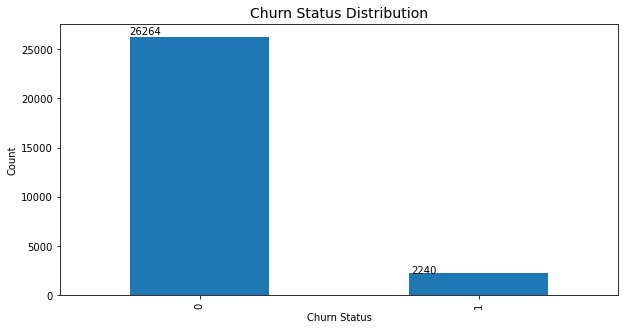

In [56]:
plt.figure(figsize=(10,5))
ax=highvalue['churn_flag'].value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution',fontsize=14)
plt.show()

### Outlier Analysis

In [57]:
highvalue.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_data_rech_6,total_data_rech_7,AVG_amt_data-67,churn_flag
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,285

1. Most of the outliers are on the revenue data and the model being built is on usage of voice and data.  
2. Hence there is no need to treat these outliers

### Univariate/Bivariate Analysis

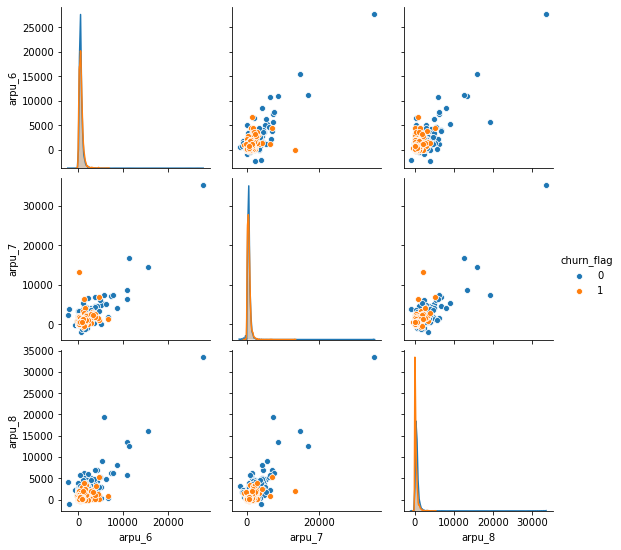

In [58]:
# arpu - Avg revenue per user
sns.pairplot(data=highvalue[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')
plt.show()

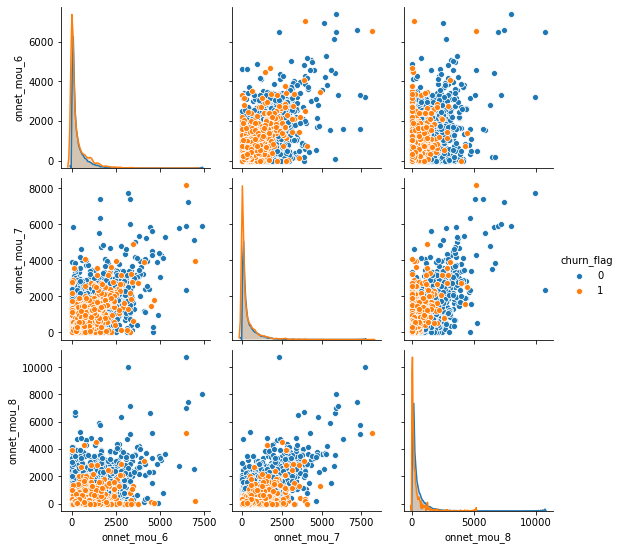

In [59]:
# onnet_mou - same network usage
sns.pairplot(data=highvalue[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')
plt.show()

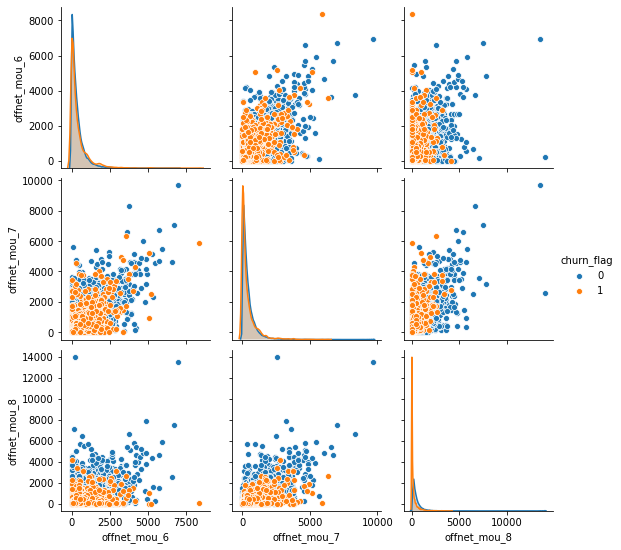

In [60]:
# offnet_mou - calls putside network
sns.pairplot(data=highvalue[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')
plt.show()

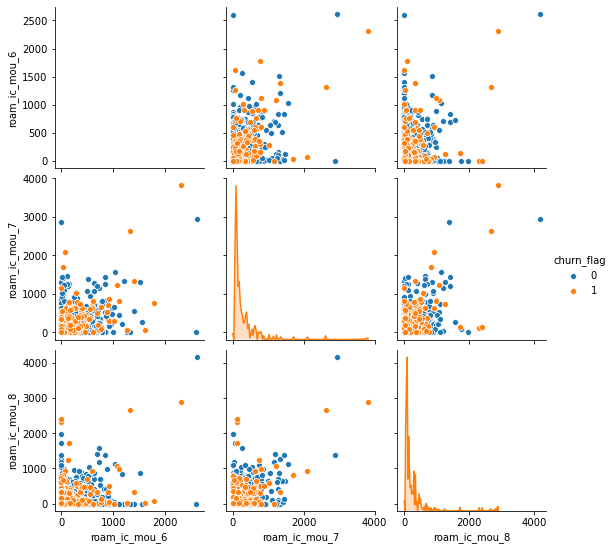

In [61]:
# roam_ic_mou - customer in roaming zone
sns.pairplot(data=highvalue[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

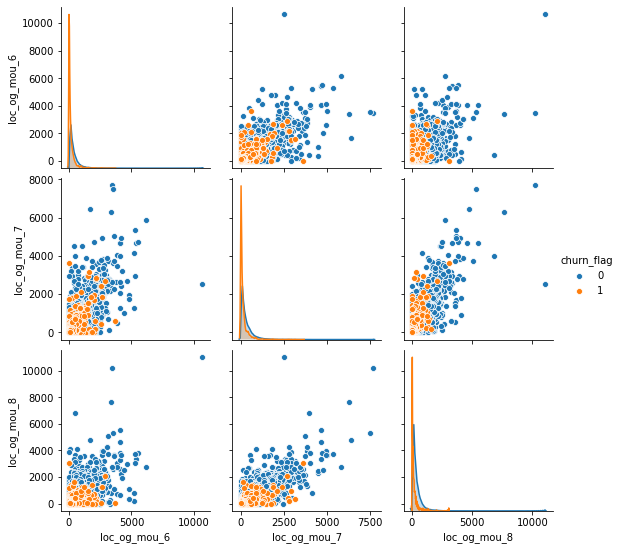

In [62]:
# loc_og_mou - within the circle outgoing calls
sns.pairplot(data=highvalue[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

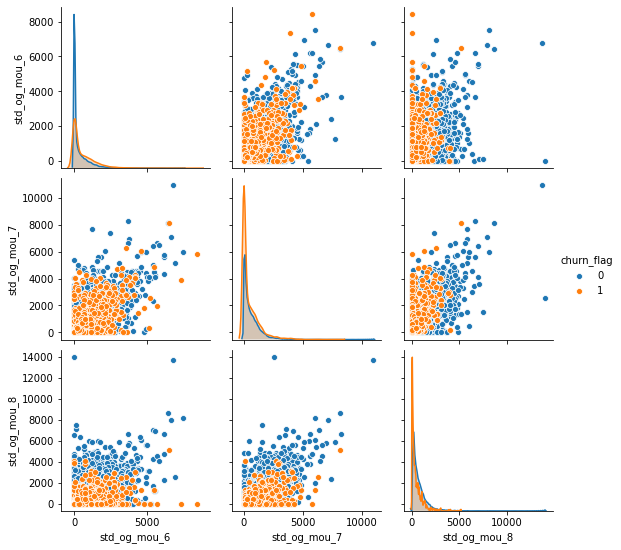

In [63]:
# std_og_mou - std outgoing calls
sns.pairplot(data=highvalue[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

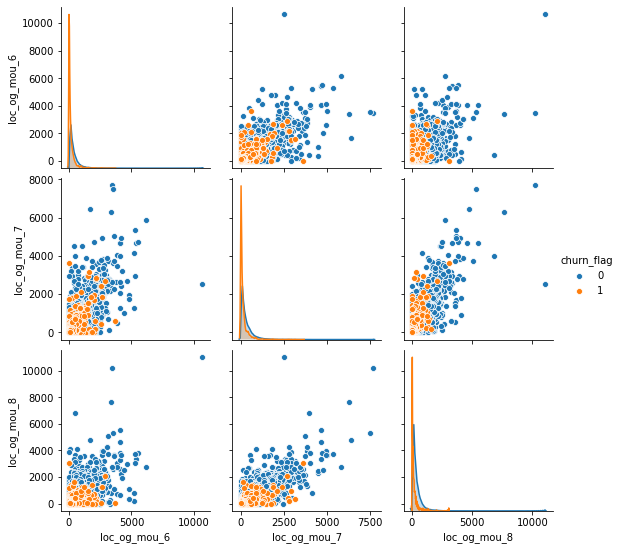

In [64]:
# isd_og - international calling
sns.pairplot(data=highvalue[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

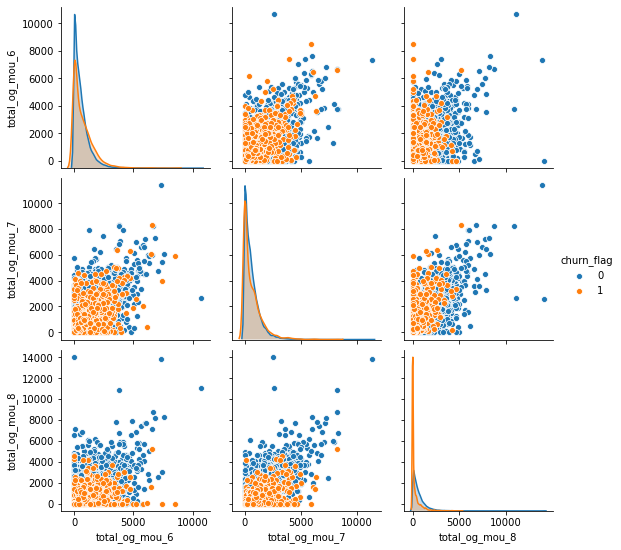

In [65]:
# totalog - total outgoing calls
sns.pairplot(data=highvalue[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag')
plt.show()

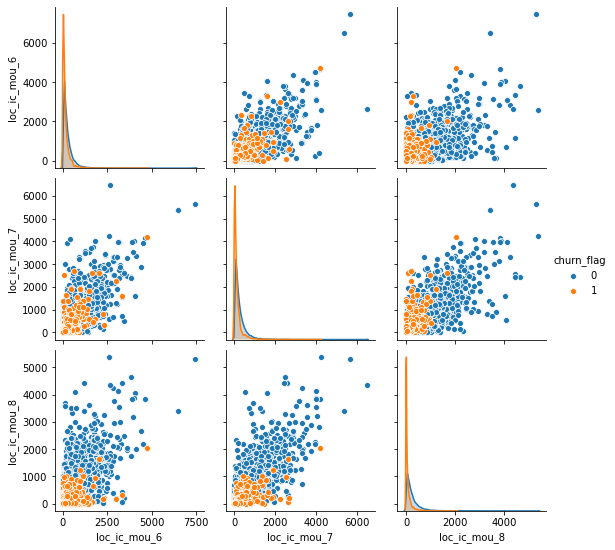

In [66]:
# locic - incoming local calls
sns.pairplot(data=highvalue[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

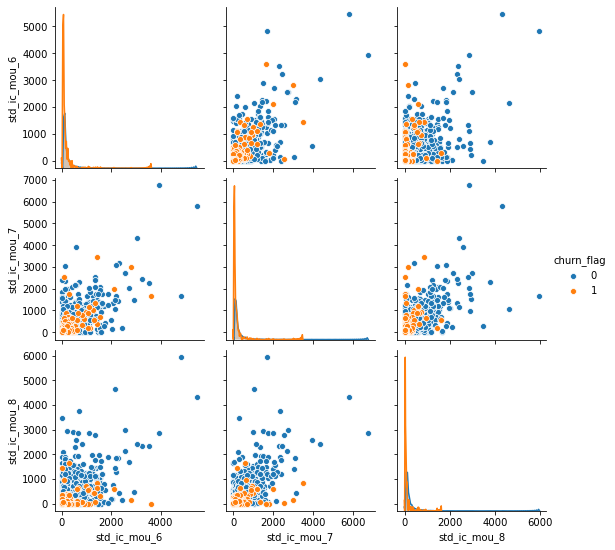

In [67]:
# stdic - outside circle incoming calls
sns.pairplot(data=highvalue[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

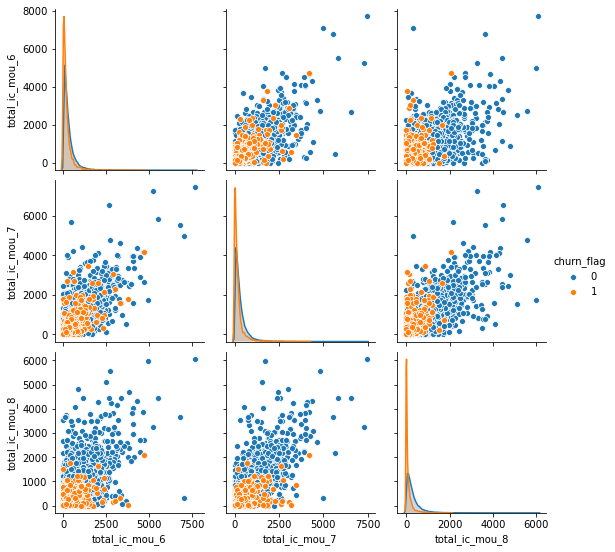

In [68]:
# totalic - total incoming call
sns.pairplot(data=highvalue[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag')
plt.show()

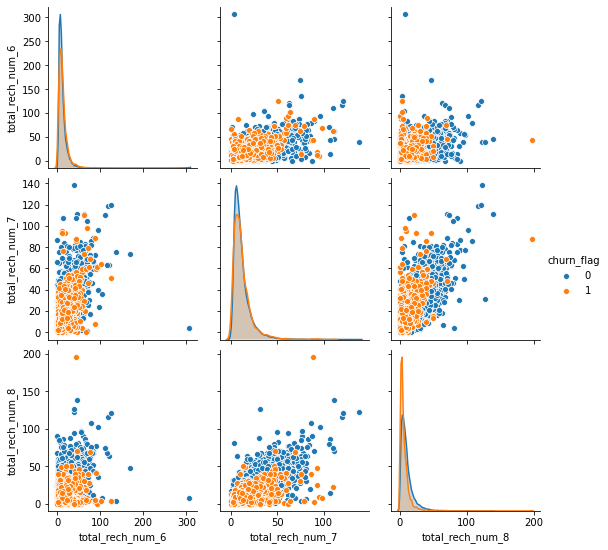

In [69]:
# total_rechnum - no.of times recharged, total_rechdata - no. of time mobile data is recharged
sns.pairplot(data=highvalue[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')
plt.show()

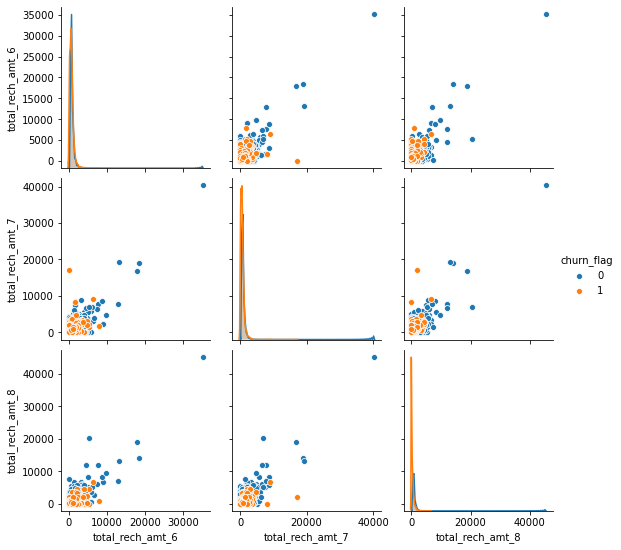

In [70]:
#total_rechamt - total recharge amt in a specific month
sns.pairplot(data=highvalue[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag')
plt.show()

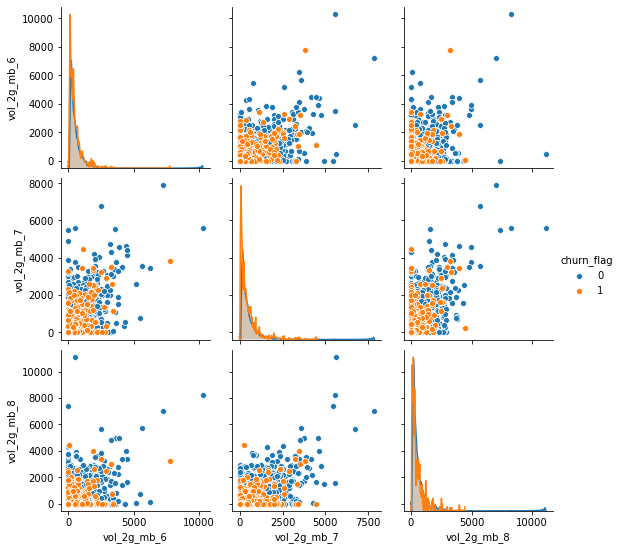

In [71]:
# vol_2gmb - internet usage(MB)
sns.pairplot(data=highvalue[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn_flag']],hue='churn_flag')
plt.show()

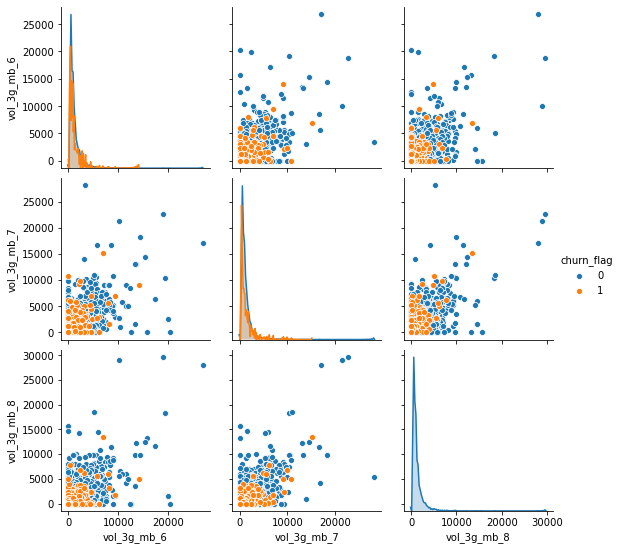

In [72]:
# vol_3gmb - internet usage(MB)
sns.pairplot(data=highvalue[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn_flag']],hue='churn_flag')
plt.show()

We checked scatter plots and found that nearly 2.5% to 10% are tagged as outliers based on the feature.  
We check the pattern between churn vs non-churn it's almost same across them and also it's same across the features as well.
It's better not exclude the ouliers from the model as it will help during model creation

In [73]:
# Create correlation matrix
corr_matrix = highvalue.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:44

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0']


1. 44 highly correlated features (> 80%) found in the data set.
2. We will not drop these features as it will be taken care during feature reduction methods such as RFE, LASSO and PCA.


### Derived Features

In [74]:
#Breaking down age on network to months from days
highvalue['mon'] = highvalue['aon']/30
highvalue.drop('aon', axis=1, inplace=True)
highvalue['mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: mon, dtype: float64

In [75]:
def compute_yr(x):
    if x<=12:
        return "<1"
    elif x<=24 and x>12:
        return "1-2"
    elif x<=60 and x>24:
        return "2-5"
    else:
        return "5+"
    
highvalue['years_with_company'] = highvalue.apply(lambda x: compute_yr(x['mon']),axis=1)
highvalue['years_with_company'].unique()

array(['2-5', '<1', '1-2', '5+'], dtype=object)

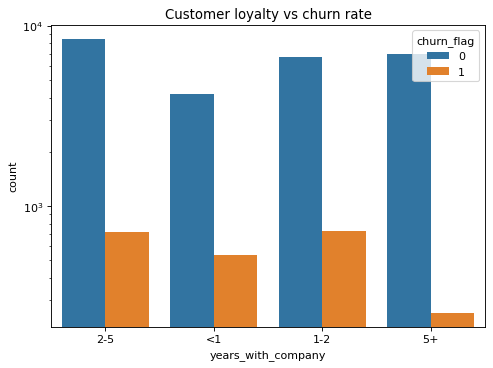

In [76]:
plt.figure(figsize=(7,5),edgecolor="k",facecolor="w",dpi=80)
sns.countplot(highvalue['years_with_company'],hue=highvalue["churn_flag"])
plt.yscale("log")
plt.title("Customer loyalty vs churn rate")
plt.show()

We can clearly see that churn rate is high among customers with 1-2 years and extremely low once the customer has crossed 5+ years

In [77]:
# creating colulmn, which would be average of 6th & 7th months

# list of columns belonging to 6th and 7th months
col_list = highvalue.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print(col_list.unique())

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'monthly_2g',
       'sachet_2g', 'monthly_3g', 'sachet_3g', 'rech_days_left',
       'total_data_rech'],
      dtype='object')


In [78]:
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # to create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    highvalue[avg_col_name] = (highvalue[col_6] + highvalue[col_7])/ 2

In [79]:
# dropping columns after deriving new features
print("Dimension of the updated dataset after creating dervied features: ",highvalue.shape)
col_to_drop = highvalue.filter(regex='_6|_7').columns
highvalue.drop(col_to_drop, axis=1, inplace=True)
print("Dimension of the dataset after dropping old columns: ",highvalue.shape)

Dimension of the updated dataset after creating dervied features:  (28504, 197)
Dimension of the dataset after dropping old columns:  (28504, 109)


In [80]:
highvalue.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_8,AVG_amt_data-67,churn_flag,mon,years_with_company,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_arpu_3g_av67,avg_arpu_2g_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_rech_days_left_av67,avg_total_data_rech_av67
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,5.0,1185.0,1,26.733333,2-5,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,4.5,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,19.83,0.00,0,3,0,0,21.03,910.65,122.16,0,0,1,0,1,0,0,0,0,1,0,1,1.0,696.0,0,10.500000,<1,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.000,375.475,0.000,0.00,0.5,0.5,0.0,0.0,2.5,177.0
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,640.0,0,24.000000,1-2,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,197.27,150.67,0,0,1,1,40.45,51.86,0.00,0,0,1,0,1,0,0,0,0,1,0,1,7.0,583.0,0,20.133333,1-2,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,14

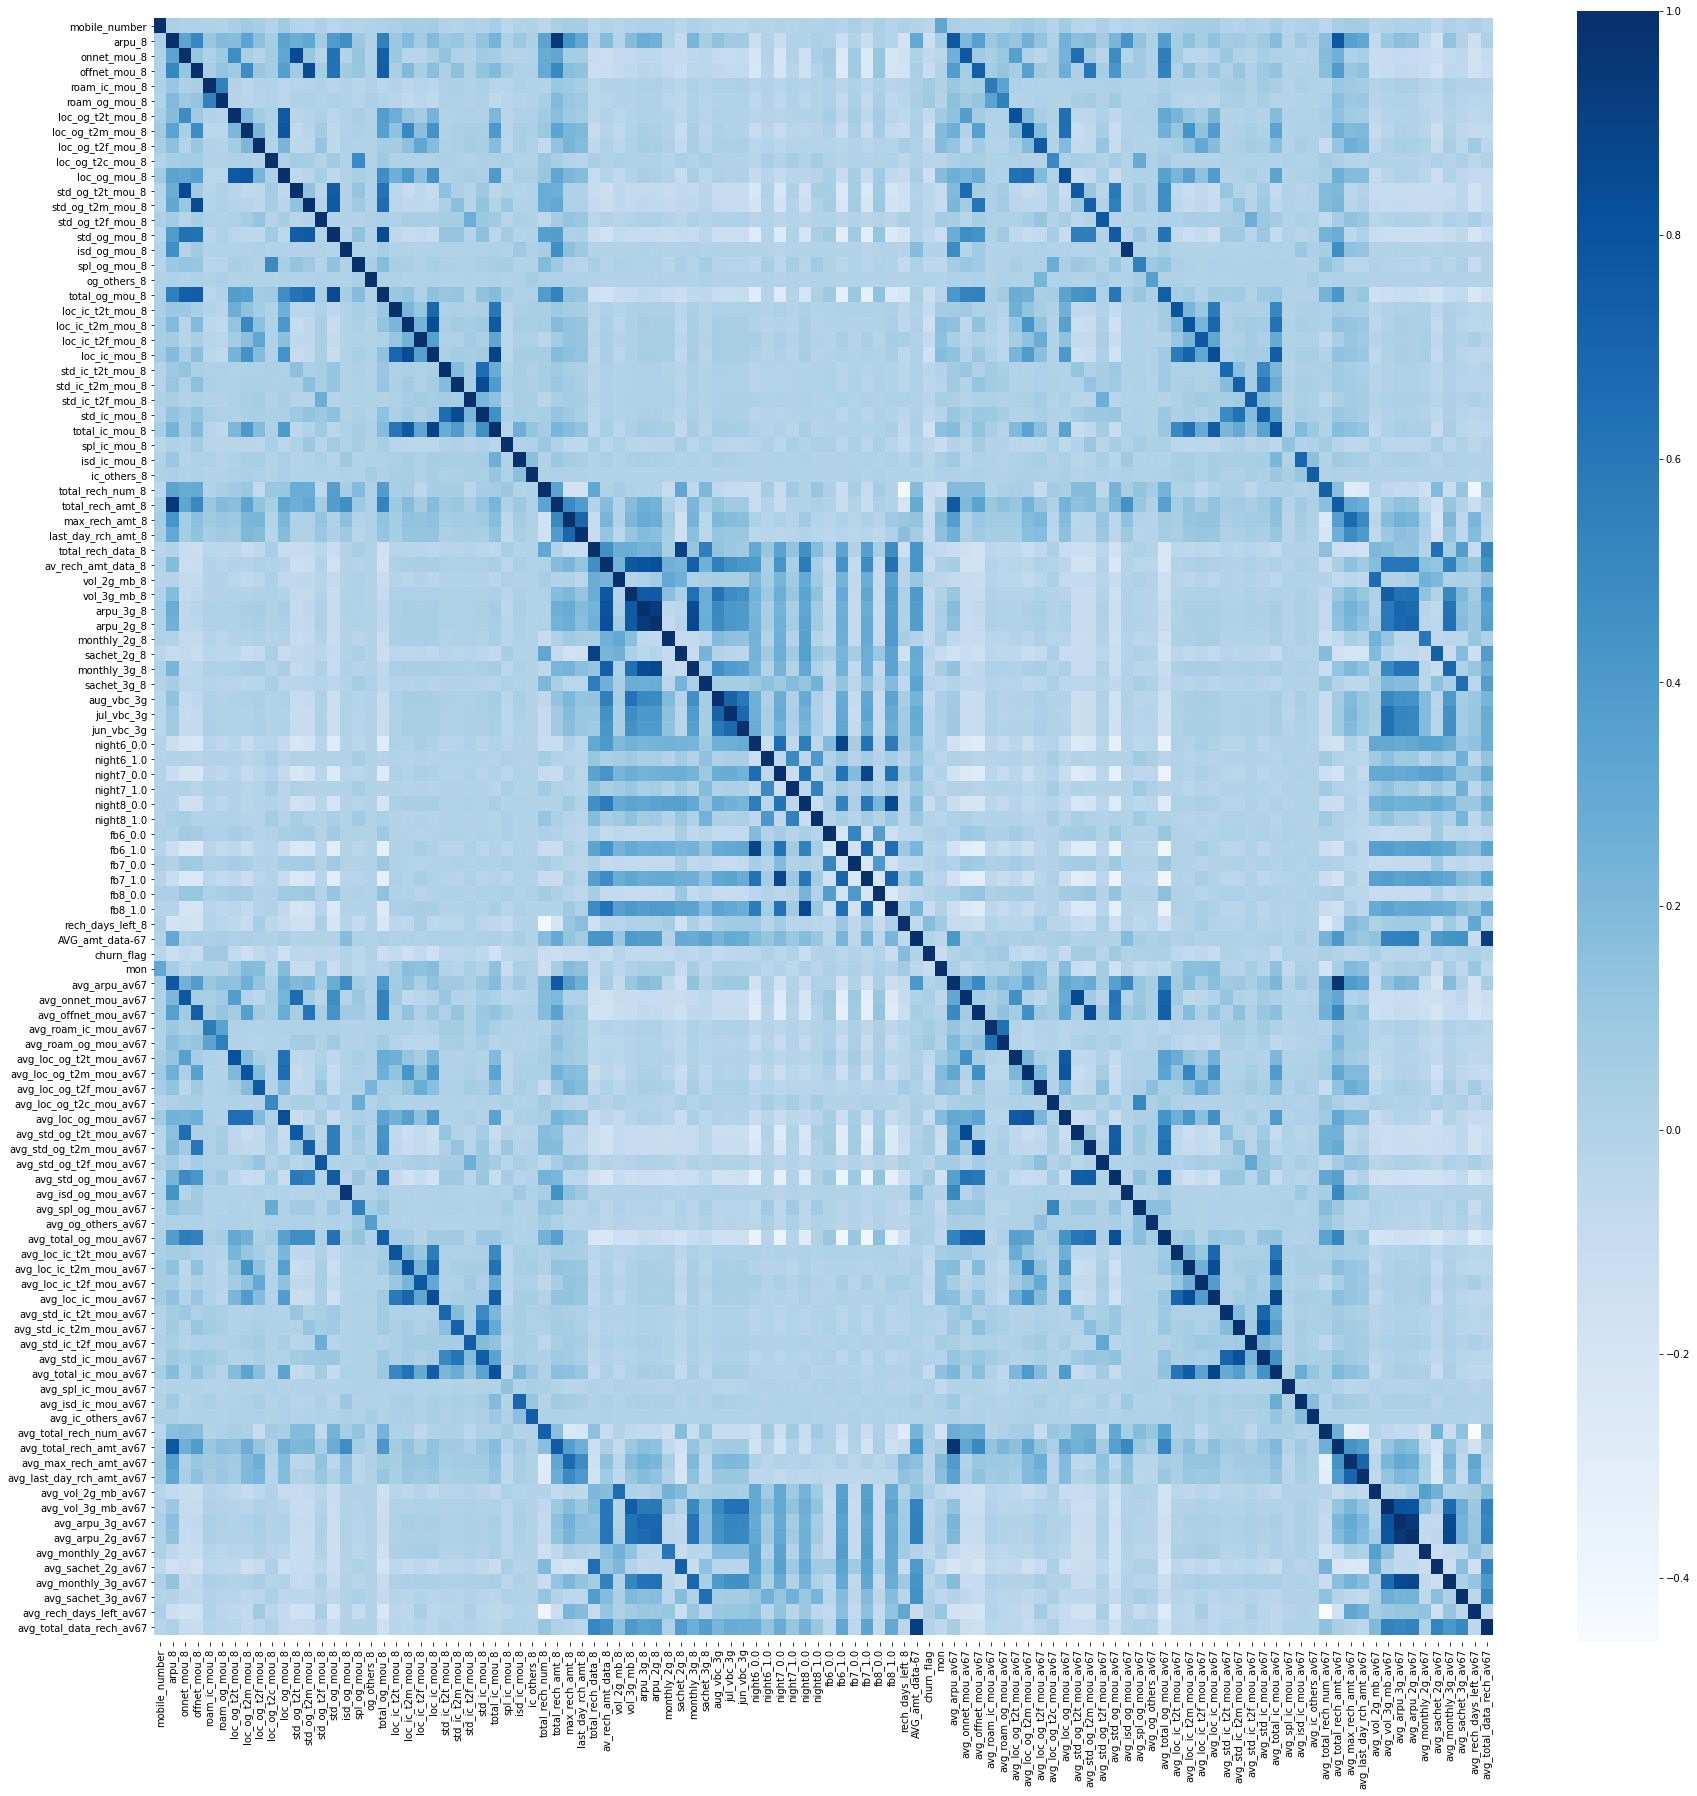

In [81]:
# checking correlation of numerical column
plt.figure(figsize = (30, 30))
sns.heatmap(highvalue.corr(), cmap="Blues")
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

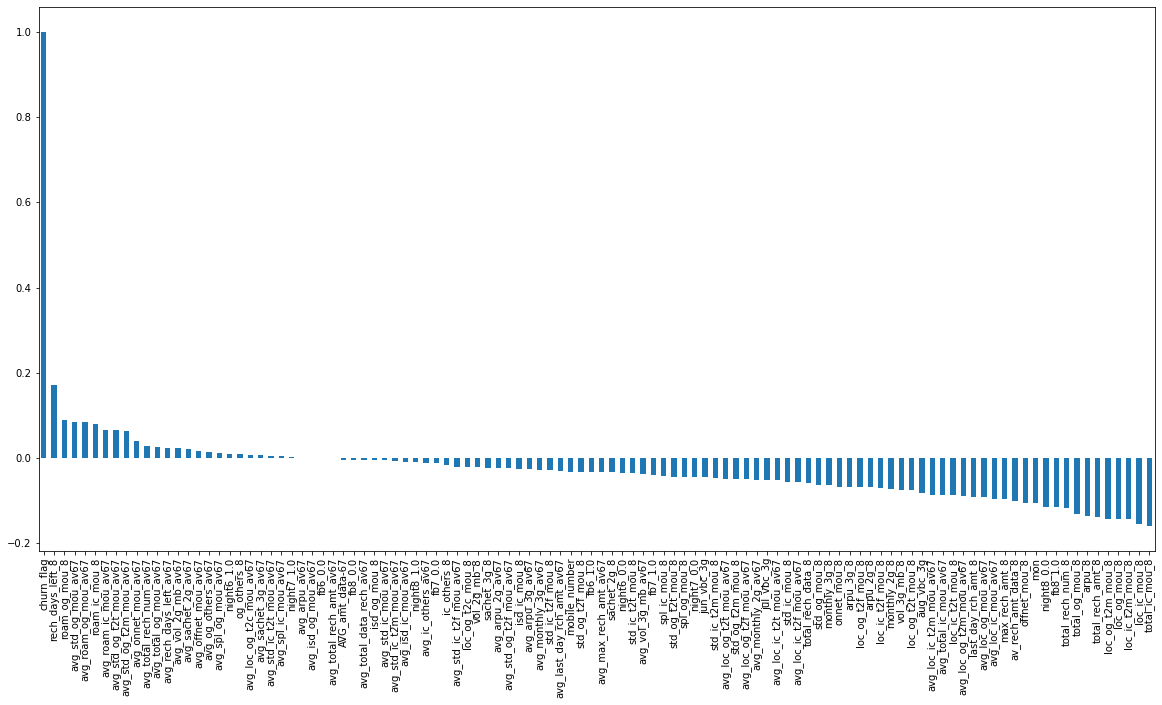

In [82]:
# checking correlation of churn with other columns
plt.figure(figsize=(20,10))
highvalue.corr()['churn_flag'].sort_values(ascending = False).plot(kind='bar')
plt.show()

1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn_flag. 
2. Avg Revenue, No. Of Recharge(amount/incoming calls) for 8th month has negative correlation with churn_flag.

### Data Preprocessing

In [83]:
# creating a new copy dataset for model building
df = highvalue[:].copy()

# lets drop years_with_company because it is highly correlated with mon column
df.drop(['years_with_company','mobile_number'],axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,rech_days_left_8,AVG_amt_data-67,churn_flag,mon,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_arpu_3g_av67,avg_arpu_2g_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_rech_days_left_av67,avg_total_data_rech_av67
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,5.0,1185.0,1,26.733333,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,4.5,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,19.83,0.00,0,3,0,0,21.03,910.65,122.16,0,0,1,0,1,0,0,0,0,1,0,1,1.0,696.0,0,10.500000,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.000,375.475,0.000,0.00,0.5,0.5,0.0,0.0,2.5,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,640.0,0,24.000000,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,197.27,150.67,0,0,1,1,40.45,51.86,0.00,0,0,1,0,1,0,0,0,0,1,0,1,7.0,583.0,0,20.133333,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,0.240,299.545,1

In [84]:
df.shape

(28504, 107)

In [85]:
# creating X & y dataset for model building
X = df.drop(['churn_flag'], axis=1)
y = df['churn_flag']

df.drop('churn_flag', axis=1, inplace=True)

In [86]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)
print("Dimension of y_train:", y_train.shape)
print("Dimension of y_test:", y_test.shape)

Dimension of X_train: (19952, 106)
Dimension of X_test: (8552, 106)
Dimension of y_train: (19952,)
Dimension of y_test: (8552,)


In [88]:
# As observed before the dataset is highly skewed, we need to balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [89]:
y_tr.value_counts()

1    18399
0    18399
Name: churn_flag, dtype: int64

In [90]:
round((y_tr.value_counts()*100 / y_tr.shape[0]),2)

1    50.0
0    50.0
Name: churn_flag, dtype: float64

In [91]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)
print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Dimension of X_tr Shape: (36798, 106)
Dimension of y_tr Shape: (36798,)
Imbalance in Training dataset: 1.0


### Model Building

### 1. Logistic Regression with RFE

In [92]:
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 25 most imp features for us
rfe = RFE(lr, 25)   
rfe = rfe.fit(X_tr, y_tr)

In [93]:
rfe_features = list(df.columns[rfe.support_])
rfe_features

['offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'av_rech_amt_data_8',
 'aug_vbc_3g',
 'rech_days_left_8',
 'mon',
 'avg_arpu_av67',
 'avg_loc_og_t2t_mou_av67',
 'avg_loc_og_mou_av67',
 'avg_loc_ic_t2m_mou_av67',
 'avg_loc_ic_mou_av67']

In [94]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
X_rfe.columns = rfe_features
y_rfe = y_tr
X_rfe.head()

,offnet_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2m_mou_8,isd_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,av_rech_amt_data_8,aug_vbc_3g,rech_days_left_8,mon,avg_arpu_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_mou_av67
0,-0.629162,0.327898,-0.352588,-0.671487,-0.308850,-0.395529,-0.043206,-0.404886,-0.704343,-0.199899,-0.131672,-0.804201,-0.244531,-0.744350,-0.078057,0.388649,-0.639461,-0.407587,1.546081,-0.780007,0.441929,-0.031555,-0.079194,-0.024003,-0.047548
1,-0.580772,-0.193705,-0.226547,-0.394813,-0.268718,-0.391212,-0.043206,-0.156944,-0.181157,-0.016045,-0.131672,-0.335156,-0.244531,-0.667424,-0.195269,0.249308,-0.639461,-0.407587,-0.225604,0.032094,1.531029,1.302311,2.019133,2.152016,1.971724
2,1.036228,-0.125284,1.553898,2.564098,1.128864,-0.273654,-0.043206,1.787115,2.193352,0.414415,0.095916,2.373733,-0.244531,2.967750,1.094067,0.249308,0.682752,0.376402,-0.816166,0.437626,3.735335,1.268464,2.269544,2.210369,2.476037
3,-0.535265,-0.193705,-0.144626,-0.411646,-0.308850,-0.377946,-0.043206,0.205484,0.094641,0.034459,-0.006597,0.024151,-0.244531,0.168944,0.519727,-0.656413,0.682752,0.630018,0.364957,1.652148,0.288428,-0.278356,-0.469588,0.125997,0.049756
4,-0.721164,-0.193705,-0.352588,-0.671487,-0.308850,-0.395529,-0.043206,-0.404886,-0.671848,-0.199899,-0.131672,-0.781562,-0.244531,-0.989859,-0.957149,-0.656413,-0.639461,-0.407587,-0.225604,-0.813196,-0.138717,-0.383297,-0.424357,-0.569010,-0.668235


In [95]:
# lets create a Logisctic Regression model on the seleted columns by RFE

lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [96]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
# prediction
y_pred = lr.predict(X_test_rfe)

print(confusion_matrix(y_test,y_pred))
print(lr.score(X_test_rfe,y_test))
print(classification_report(y_test,y_pred))

[[6179 1686]
 [ 137  550]]
0.7868334892422825
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7865
           1       0.25      0.80      0.38       687

    accuracy                           0.79      8552
   macro avg       0.61      0.79      0.62      8552
weighted avg       0.92      0.79      0.83      8552



In [97]:
# result table
results = pd.DataFrame({'Method':['Log Reg with RFE'], 'Accuracy': 0.79,'Sensitivity': 0.78, 'Specificity': 0.79 })
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79


Conclusion from the above model:  
Model Accuracy is approx 79% with high false positive rate. Let's try to do PCA to improve model performance

### PCA 

In [98]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=1)

# apply PCA on train data
pca.fit(X_tr)

PCA(random_state=1)

In [99]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(36798, 106)
(8552, 106)


In [100]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      11.82 
1      21.24 
2      27.32 
3      32.51 
4      36.63 
5      40.44 
6      43.92 
7      47.21 
8      50.33 
9      52.87 
10     55.20 
11     57.40 
12     59.47 
13     61.41 
14     63.22 
15     64.87 
16     66.41 
17     67.80 
18     69.13 
19     70.42 
20     71.67 
21     72.82 
22     73.95 
23     75.03 
24     76.09 
25     77.12 
26     78.13 
27     79.10 
28     80.02 
29     80.90 
30     81.74 
31     82.54 
32     83.32 
33     84.08 
34     84.78 
35     85.48 
36     86.16 
37     86.82 
38     87.45 
39     88.08 
40     88.70 
41     89.31 
42     89.91 
43     90.49 
44     91.05 
45     91.61 
46     92.13 
47     92.63 
48     93.12 
49     93.59 
50     94.04 
51     94.43 
52     94.80 
53     95.13 
54     95.43 
55     95.72 
56     96.00 
57     96.27 
58     96.54 
59     96.81 
60     97.06 
61     97.30 
62     97.53 
63     97.73 
64     97.93 
65     98.13 
66     98.32 
67     98.50 
68     98.66 
69     98.81 
70     98.96 
71    

~80% of variance is explainced by 28 features  
~90% of variance is explained by 43 features  
~95% of variance is explained by 53 features  

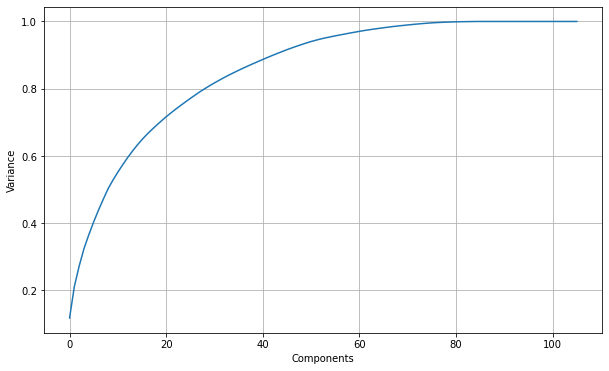

In [101]:
#Skree plot
f = plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

### 2. Logistic Regression + PCA

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [103]:
# create pipeline
PCA_VARS = 43
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [104]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7862369687249399

In [105]:
from imblearn.metrics import sensitivity_specificity_support

In [106]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[6184 1681]
 [ 135  552]]
Sensitivity: 	0.8
Specificity: 	0.79
AUC:    	 0.85


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7865
           1       0.25      0.80      0.38       687

    accuracy                           0.79      8552
   macro avg       0.61      0.79      0.63      8552
weighted avg       0.92      0.79      0.83      8552



In [108]:
tempresults = pd.DataFrame({'Method':['Log_Reg_PCA'], 'Accuracy': 0.79, 'Sensitivity': round(sensitivity, 2), 
                            'Specificity': round(specificity, 2) })
results = pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79
0,Log_Reg_PCA,0.79,0.80,0.79


### Logistic Regression + PCA with Hyperparameter Tuning

In [109]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.922163
1    0.077837
Name: churn_flag, dtype: float64

In [110]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.08, 1: 0.92})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [28, 43], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2'],
         'logistic__solver': ['lbfgs', 'liblinear']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [111]:
logistic.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [112]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.08,
                                                                         1: 0.92}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear'],
                         'pca__n_components': [28, 43]},
             scoring='roc_auc', verbose=1)

In [113]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_logistic__solver,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.824454,0.287853,0.000000,0.000000,0.1,l1,lbfgs,28,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'lbfgs', 'pca__n_components': 28}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
1,1.143359,0.305037,0.000000,0.000000,0.1,l1,lbfgs,43,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'lbfgs', 'pca__n_components': 43}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
2,1.163583,0.110350,0.042734,0.008439,0.1,l1,liblinear,28,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear', 'pca__n_components': 28}",0.848439,0.853409,0.847922,0.842807,0.850343,0.848584,0.003470,46
3,1.929542,0.052257,0.057302,0.018878,0.1,l1,liblinear,43,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear', 'pca__n_components': 43}",0.856567,0.854000,0.854845,0.851173,0.853408,0.853999,0.001769,5
4,1.494621,0.100562,0.055333,0.009917,0.1,l2,lbfgs,28,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs', 'pca__n_components': 28}",0.849575,0.853728,0.847063,0.843911,0.850577,0.848971,0.003311,35
5,1.942141,0.086861,0.051305,0.016009,0.1,l2,lbfgs,43,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs', 'pca__n_components': 43}",0.858787,0.853279,0.854738,0.853113,0.850838,0.854151,0.002632,1
6,1.711145,0.082625,0.046043,0.008327,0.1,l2,liblinear,28,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear', 'pca__n_components': 28}",0.849078,0.853717,0.847997,0.842556,0.850284,0.848727,0.003635,42
7,2.332486,0.124000,0.043207,0.006787,0.1,l2,liblinear,43,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear', 'pca__n_components': 43}",0.857933,0.852336,0.854996,0.853015,0.851224,0.853901,0.002360,11
8,1.044101,0.019361,0.000000,0.000000,0.5,l1,lbfgs,28,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'logistic__solver': 'lbfgs', 'pca__n_components': 28}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
9,1.549690,0.141715,0.000000,0.000000,0.5,l1,lbfgs,43,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'logistic__solver': 'lbfgs', 'pca__n_components': 43}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55


In [114]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.854150793515756
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs', 'pca__n_components': 43}


In [115]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[6232 1633]
 [ 143  544]]
Sensitivity: 	0.79
Specificity: 	0.79
AUC:    	 0.85


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      7865
           1       0.25      0.79      0.38       687

    accuracy                           0.79      8552
   macro avg       0.61      0.79      0.63      8552
weighted avg       0.92      0.79      0.84      8552



In [117]:
tempresults = pd.DataFrame({'Method':['Log_Reg_PCA_HyperparamerTuning'], 'Accuracy': 0.79, 'Sensitivity': round(sensitivity, 2), 
                            'Specificity': round(specificity, 2) })
results = pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79
0,Log_Reg_PCA,0.79,0.80,0.79
0,Log_Reg_PCA_HyperparamerTuning,0.79,0.79,0.79


Conclusions from the above model:  
Model has 80% Specificity and Sensitivity 43 features explaining 90% variance in the dataset  

### 3. Decision Tree Classifier

In [118]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(36798, 106)
(36798,)


In [119]:
np.unique(y_tr,return_counts=True)

(array([0, 1]), array([18399, 18399], dtype=int64))

In [120]:
# importing libraries
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [121]:
# Applying feature selection using lasso

# Prefer dual=False when n_samples > n_features, #specifying C - regularization parameter
lasso = LinearSVC(C=0.001, penalty="l1", random_state=100, dual=False).fit(X_tr, y_tr)  
lasso_model = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_model.transform(X_tr)
position = lasso_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(36798, 35)
[  0   4   6   7   9  12  15  17  21  26  27  30  31  33  35  40  44  51
  55  58  59  60  61  62  65  66  73  75  79  81  88  92  96 100 101]


In [122]:
# features selected by Lasso
list(df.columns[position])

['arpu_8',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'av_rech_amt_data_8',
 'monthly_2g_8',
 'aug_vbc_3g',
 'night8_0.0',
 'fb7_0.0',
 'fb8_1.0',
 'rech_days_left_8',
 'AVG_amt_data-67',
 'mon',
 'avg_arpu_av67',
 'avg_roam_ic_mou_av67',
 'avg_roam_og_mou_av67',
 'avg_std_og_t2m_mou_av67',
 'avg_std_og_mou_av67',
 'avg_total_og_mou_av67',
 'avg_loc_ic_t2m_mou_av67',
 'avg_total_ic_mou_av67',
 'avg_total_rech_num_av67',
 'avg_vol_2g_mb_av67',
 'avg_monthly_2g_av67',
 'avg_sachet_2g_av67']

In [123]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# creating decision tree with default parameters except max depth
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [124]:
# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

In [125]:
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[6660 1205]
 [ 233  454]]
0.8318521983161834
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7865
           1       0.27      0.66      0.39       687

    accuracy                           0.83      8552
   macro avg       0.62      0.75      0.64      8552
weighted avg       0.91      0.83      0.86      8552



In [126]:
tempresults = pd.DataFrame({'Method':['Decision_Tree_Lasso'], 'Accuracy': 0.83, 'Sensitivity': 0.68, 'Specificity': 0.84 })
results = pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79
0,Log_Reg_PCA,0.79,0.80,0.79
0,Log_Reg_PCA_HyperparamerTuning,0.79,0.79,0.79
0,Decision_Tree_Lasso,0.83,0.68,0.84


### Tuning Hyperparams 

In [127]:
# optimizing max-depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [128]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.195116,0.033964,0.003215,0.000831,1,{'max_depth': 1},0.733016,0.744158,0.739130,0.742764,0.739095,0.739633,0.003863,39,0.742476,0.740404,0.741660,0.740854,0.741737,0.741426,0.000725
1,0.379445,0.018989,0.003717,0.000451,2,{'max_depth': 2},0.762500,0.791848,0.791848,0.784617,0.785840,0.783331,0.010835,38,0.786976,0.781949,0.781982,0.783926,0.783552,0.783677,0.001834
2,0.555626,0.031722,0.004060,0.000787,3,{'max_depth': 3},0.785462,0.811005,0.812908,0.805137,0.809077,0.804718,0.009966,37,0.807698,0.805252,0.804810,0.807296,0.805768,0.806165,0.001136
3,0.732401,0.068675,0.003663,0.000365,4,{'max_depth': 4},0.807065,0.829348,0.833152,0.831091,0.836527,0.827437,0.010462,36,0.841260,0.833141,0.827230,0.828934,0.830463,0.832206,0.004926
4,0.608696,0.094759,0.002000,0.000010,5,{'max_depth': 5},0.821739,0.851359,0.858016,0.857861,0.849708,0.847737,0.013424,35,0.860385,0.854678,0.850839,0.852950,0.848670,0.853504,0.003987


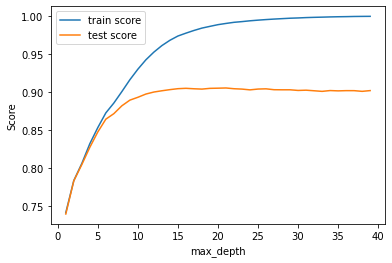

In [129]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], score["mean_train_score"], label="train score")
plt.plot(score["param_max_depth"], score["mean_test_score"], label="test score")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [130]:
tree.best_params_

{'max_depth': 21}

In [131]:
#Optimizing for min_samples_leaf

nfolds=5
params={'min_samples_leaf': range(5,300,20)}
dtree = DecisionTreeClassifier(criterion = "gini",random_state=100)
tree = GridSearchCV(dtree,cv=nfolds,param_grid=params,return_train_score=True,n_jobs=-1,scoring='accuracy')
tree.fit(X_lasso,y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [132]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.088393,0.121908,0.004620,0.000800,5,{'min_samples_leaf': 5},0.856658,0.903261,0.902582,0.906101,0.910993,0.895919,0.019853,1,0.969325,0.962565,0.961410,0.961514,0.959951,0.962953,0.003293
1,1.729200,0.057253,0.004271,0.000973,25,{'min_samples_leaf': 25},0.848777,0.889538,0.888723,0.892377,0.899715,0.883826,0.017948,2,0.919118,0.911883,0.909946,0.910255,0.912565,0.912753,0.003329
2,1.554602,0.060666,0.004464,0.001346,45,{'min_samples_leaf': 45},0.844158,0.883016,0.884783,0.885854,0.877565,0.875075,0.015720,3,0.902371,0.894388,0.891773,0.894969,0.890214,0.894743,0.004188
3,1.497977,0.023190,0.004200,0.001024,65,{'min_samples_leaf': 65},0.841168,0.879076,0.880027,0.883000,0.880962,0.872847,0.015892,4,0.892180,0.886371,0.881106,0.885696,0.883862,0.885843,0.003656
4,1.396115,0.056110,0.004754,0.000686,85,{'min_samples_leaf': 85},0.837772,0.875408,0.879212,0.879875,0.881234,0.870700,0.016577,5,0.885692,0.881140,0.877166,0.880635,0.879514,0.880829,0.002790


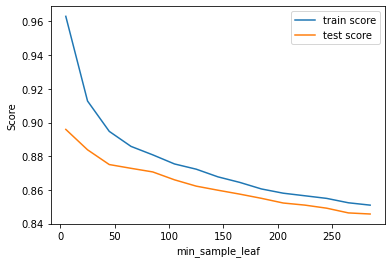

In [133]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], score["mean_train_score"], label="train score")
plt.plot(score["param_min_samples_leaf"], score["mean_test_score"], label="test score")
plt.xlabel("min_sample_leaf")
plt.ylabel("Score")
plt.legend()
plt.show()

In [134]:
tree.best_params_

{'min_samples_leaf': 5}

In [135]:
# Optimising min_samples_split

params={'min_samples_split': range(5,300,20)}
nfolds=5
dtree = DecisionTreeClassifier(criterion = "gini",random_state=100)
tree = GridSearchCV(dtree,cv=nfolds,n_jobs=-1,return_train_score=True,scoring="accuracy",param_grid=params)
tree.fit(X_lasso,y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [136]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.297013,0.089195,0.004828,0.000357,5,{'min_samples_split': 5},0.858152,0.904891,0.903940,0.910586,0.920641,0.899642,0.021579,1,0.994293,0.991711,0.992527,0.992119,0.993342,0.992799,0.000922
1,2.325213,0.134705,0.005454,0.001549,25,{'min_samples_split': 25},0.848641,0.896060,0.897147,0.903927,0.913032,0.891761,0.022393,2,0.965249,0.957164,0.955160,0.956996,0.957845,0.958483,0.003498
2,2.253321,0.118782,0.006536,0.001870,45,{'min_samples_split': 45},0.844022,0.892799,0.892935,0.899579,0.906645,0.887196,0.022181,3,0.948264,0.937292,0.935356,0.937804,0.939876,0.939718,0.004509
3,2.239580,0.114122,0.006863,0.005354,65,{'min_samples_split': 65},0.840082,0.891168,0.888723,0.896589,0.902704,0.883853,0.022409,4,0.938787,0.926965,0.922515,0.928802,0.929617,0.929337,0.005326
4,2.196989,0.136757,0.005386,0.002000,85,{'min_samples_split': 85},0.836005,0.889402,0.887636,0.891833,0.899307,0.880837,0.022766,5,0.931687,0.921190,0.912664,0.919427,0.918917,0.920777,0.006169


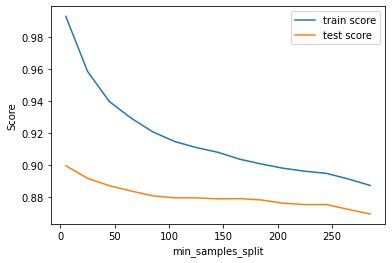

In [137]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_split"], score["mean_train_score"], label="train score")
plt.plot(score["param_min_samples_split"], score["mean_test_score"], label="test score")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.legend()
plt.show()

In [138]:
tree.best_params_

{'min_samples_split': 5}

In [139]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
    }

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [140]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.297013,0.089195,0.004828,0.000357,5,{'min_samples_split': 5},0.858152,0.904891,0.903940,0.910586,0.920641,0.899642,0.021579,1,0.994293,0.991711,0.992527,0.992119,0.993342,0.992799,0.000922
1,2.325213,0.134705,0.005454,0.001549,25,{'min_samples_split': 25},0.848641,0.896060,0.897147,0.903927,0.913032,0.891761,0.022393,2,0.965249,0.957164,0.955160,0.956996,0.957845,0.958483,0.003498
2,2.253321,0.118782,0.006536,0.001870,45,{'min_samples_split': 45},0.844022,0.892799,0.892935,0.899579,0.906645,0.887196,0.022181,3,0.948264,0.937292,0.935356,0.937804,0.939876,0.939718,0.004509
3,2.239580,0.114122,0.006863,0.005354,65,{'min_samples_split': 65},0.840082,0.891168,0.888723,0.896589,0.902704,0.883853,0.022409,4,0.938787,0.926965,0.922515,0.928802,0.929617,0.929337,0.005326
4,2.196989,0.136757,0.005386,0.002000,85,{'min_samples_split': 85},0.836005,0.889402,0.887636,0.891833,0.899307,0.880837,0.022766,5,0.931687,0.921190,0.912664,0.919427,0.918917,0.920777,0.006169


In [141]:
grid_search.best_score_

0.8833907940291983

In [142]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)

In [143]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 25,
 'min_samples_split': 50}

In [144]:
#Building optimal Dtree 
dtree_optimal = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', random_state=100, 
                       max_depth=10, min_samples_leaf=25, min_samples_split=50, min_weight_fraction_leaf=0.0, splitter='best')
dtree_optimal.fit(X_lasso,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                       min_samples_split=50, random_state=100)

In [145]:
dtree_optimal.score(X_test,y_test)

0.8562909260991581

In [146]:
y_pred = dtree_optimal.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6859 1006]
 [ 223  464]]
0.8562909260991581
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7865
           1       0.32      0.68      0.43       687

    accuracy                           0.86      8552
   macro avg       0.64      0.77      0.67      8552
weighted avg       0.92      0.86      0.88      8552



In [147]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.68
Specificity: 	0.87


In [148]:
tempresults = pd.DataFrame({'Method':['Decision_Tree_Lasso_HyperparameterTuning'], 'Accuracy': 0.86, 
                            'Sensitivity': round(sensitivity, 2), 'Specificity': round(specificity, 2) })
results = pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79
0,Log_Reg_PCA,0.79,0.80,0.79
0,Log_Reg_PCA_HyperparamerTuning,0.79,0.79,0.79
0,Decision_Tree_Lasso,0.83,0.68,0.84
0,Decision_Tree_Lasso_HyperparameterTuning,0.86,0.68,0.87


In [149]:
F = X_lasso
F = pd.DataFrame(X_lasso)
F.columns = df.columns[position]
display(F.head())

weights = pd.Series(dtree_optimal.feature_importances_,index=F.columns.values)

,arpu_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,av_rech_amt_data_8,monthly_2g_8,aug_vbc_3g,night8_0.0,fb7_0.0,fb8_1.0,rech_days_left_8,AVG_amt_data-67,mon,avg_arpu_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_mou_av67,avg_total_og_mou_av67,avg_loc_ic_t2m_mou_av67,avg_total_ic_mou_av67,avg_total_rech_num_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67
0,-0.647261,0.327898,-0.671487,-0.308850,-0.670637,-0.148014,-0.329875,-0.819818,-0.750655,-0.804201,-0.244531,-0.894135,-0.744350,0.388649,-0.639461,-0.385289,-0.407587,-1.061979,-0.219658,-0.969181,1.546081,-0.202680,-0.780007,0.441929,0.226855,0.268598,2.326076,1.275505,1.089958,-0.024003,-0.136846,-0.457738,-0.419176,-0.466923,-0.472636
1,-0.692649,-0.193705,-0.394813,-0.268718,-0.411162,-0.148014,-0.329875,-0.499809,-0.256490,-0.335156,-0.244531,-0.786763,-0.667424,0.249308,-0.639461,-0.385289,-0.407587,-1.061979,-0.219658,-0.969181,-0.225604,0.215922,0.032094,1.531029,-0.220054,-0.251300,-0.317483,1.342644,2.317471,2.152016,1.647456,-0.342266,-0.419176,-0.466923,-0.472636
2,3.047234,-0.125284,2.564098,1.128864,2.688905,-0.148014,-0.329875,1.196842,2.699882,2.373733,-0.244531,-0.142532,2.967750,0.249308,0.682752,-0.385289,0.376402,0.941638,-0.219658,1.031799,-0.816166,1.242634,0.437626,3.735335,1.855341,1.247420,-0.252333,-0.214626,1.059444,2.210369,2.266841,0.177358,-0.342014,-0.466923,-0.472636
3,0.411599,-0.193705,-0.411646,-0.308850,-0.372467,-0.148014,0.701906,-0.506277,0.128661,0.024151,-0.244531,-0.464647,0.168944,-0.656413,0.682752,-0.385289,0.630018,0.941638,-0.219658,1.031799,0.364957,0.230218,1.652148,0.288428,-0.198492,-0.251300,-0.457823,-0.553407,-0.751590,0.125997,-0.101960,-0.746418,-0.354767,-0.466923,-0.472636
4,-1.050552,-0.193705,-0.671487,-0.308850,-0.670637,-0.148014,-0.329875,-0.819818,-0.727975,-0.781562,-0.244531,-0.786763,-0.989859,-0.656413,-0.639461,-0.385289,-0.407587,-1.061979,-0.219658,-0.969181,-0.225604,-0.184352,-0.813196,-0.138717,-0.220054,-0.251300,0.916473,0.421246,0.132668,-0.569010,-0.740262,-0.515474,-0.293197,0.811822,-0.266541


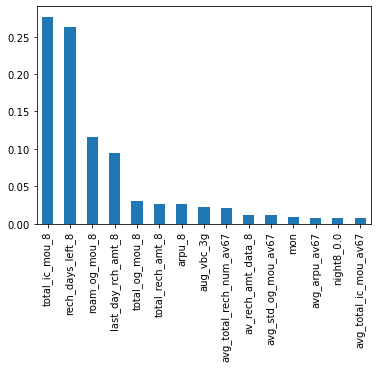

In [150]:
weights.sort_values(ascending=False)[:15].plot(kind='bar')
plt.show()

Conclusion from the model:  
Model gave 86% accuracy with 68% sensitivity and 87% specificity.   
Confusion matix proves presence of false positives. Let's try Random forest to see if we can further improve the performance

### 4. Random Forest

In [151]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.08, 1: 0.92}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [152]:
# fit model
model.fit(X_lasso, y_tr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08, 1: 0.92},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [153]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9896001428399114
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [154]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(metrics.roc_auc_score(y_test, y_pred_prob),2))

[[7425  440]
 [ 305  382]]
Sensitivity: 	0.56
Specificity: 	0.94
AUC:    	 0.9


In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7865
           1       0.46      0.56      0.51       687

    accuracy                           0.91      8552
   macro avg       0.71      0.75      0.73      8552
weighted avg       0.92      0.91      0.92      8552



In [156]:
tempresults = pd.DataFrame({'Method':['Random_Forest_Lasso'], 'Accuracy': 0.91, 'Sensitivity': round(sensitivity, 2), 
                            'Specificity': round(specificity, 2) })
results = pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79
0,Log_Reg_PCA,0.79,0.80,0.79
0,Log_Reg_PCA_HyperparamerTuning,0.79,0.79,0.79
0,Decision_Tree_Lasso,0.83,0.68,0.84
0,Decision_Tree_Lasso_HyperparameterTuning,0.86,0.68,0.87
0,Random_Forest_Lasso,0.91,0.56,0.94


#### Tuning Random forest hyper parameter

In [157]:
# Max-depth optimization

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.316911,0.086636,0.090192,0.023971,2,{'max_depth': 2},0.796875,0.796196,0.793614,0.793586,0.796983,0.795451,0.001535,4,0.807494,0.795978,0.796861,0.794320,0.792894,0.797509,0.005175
1,10.997603,0.502727,0.167487,0.013957,7,{'max_depth': 7},0.862364,0.883288,0.890761,0.887213,0.890202,0.882766,0.010540,3,0.900775,0.892690,0.889225,0.892354,0.891742,0.893357,0.003903
2,16.824580,0.239956,0.254691,0.011754,12,{'max_depth': 12},0.908560,0.929348,0.936413,0.932328,0.937084,0.928746,0.010478,2,0.967525,0.964773,0.962599,0.962159,0.964877,0.964387,0.001918
3,19.569755,0.432620,0.293007,0.029083,17,{'max_depth': 17},0.924457,0.942799,0.952038,0.950944,0.953662,0.944780,0.010831,1,0.989401,0.989775,0.989096,0.988790,0.989232,0.989259,0.000327


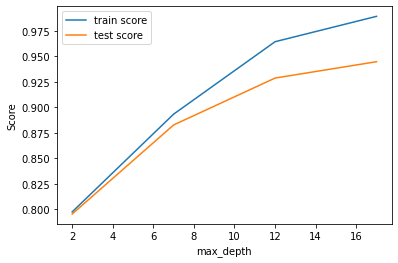

In [159]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="train score")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test score")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [160]:
rf.best_params_

{'max_depth': 17}

In [161]:
# min_samples_leaf optimization

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [162]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.737647,0.923877,0.215178,0.030495,50,{'min_samples_leaf': 50},0.862772,0.888043,0.897690,0.894823,0.894823,0.887630,0.012828,1,0.908893,0.897479,0.894966,0.897483,0.899045,0.899573,0.004840
1,12.666580,0.283110,0.197463,0.032205,100,{'min_samples_leaf': 100},0.853940,0.875951,0.884647,0.879467,0.885718,0.875945,0.011557,2,0.891739,0.882499,0.878592,0.882333,0.882367,0.883506,0.004373
2,11.588138,0.517295,0.188300,0.024181,150,{'min_samples_leaf': 150},0.849864,0.865897,0.876630,0.873216,0.874168,0.867955,0.009727,3,0.881751,0.872580,0.870372,0.871497,0.872448,0.873730,0.004088
3,10.675515,1.323516,0.204880,0.008215,200,{'min_samples_leaf': 200},0.844022,0.859239,0.870788,0.866966,0.869819,0.862167,0.009937,4,0.873361,0.866193,0.863374,0.865994,0.865315,0.866847,0.003406
4,10.237216,0.611113,0.159941,0.020465,250,{'min_samples_leaf': 250},0.840489,0.860054,0.864538,0.863704,0.867102,0.859177,0.009613,5,0.868911,0.865072,0.857633,0.862869,0.863514,0.863600,0.003647


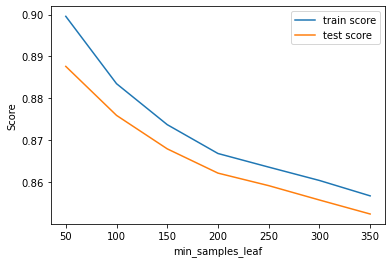

In [163]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="train score")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test score")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.legend()
plt.show()

In [164]:
rf.best_params_

{'min_samples_leaf': 50}

In [165]:
# min_samples_split optimization

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

In [166]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.889616,0.987572,0.236509,0.049519,100,{'min_samples_split': 100},0.877717,0.905163,0.917663,0.911265,0.915614,0.905484,0.014529,1,0.937903,0.926490,0.926422,0.925303,0.926662,0.928556,0.004698
1,18.016321,0.935684,0.267537,0.021786,125,{'min_samples_split': 125},0.873777,0.900815,0.910734,0.908683,0.908140,0.900430,0.013742,2,0.927577,0.918269,0.916638,0.919223,0.917524,0.919846,0.003958
2,17.491932,0.645149,0.250283,0.038104,150,{'min_samples_split': 150},0.869293,0.899185,0.908832,0.902840,0.904607,0.896951,0.014173,3,0.922719,0.912392,0.911407,0.912531,0.911580,0.914126,0.004319
3,17.457361,0.886832,0.218384,0.059589,175,{'min_samples_split': 175},0.866576,0.895380,0.905842,0.901209,0.904063,0.894614,0.014461,4,0.918371,0.907738,0.906447,0.908149,0.906587,0.909458,0.004504
4,16.578528,0.648942,0.241925,0.010495,200,{'min_samples_split': 200},0.865353,0.892663,0.906114,0.896182,0.900938,0.892250,0.014190,5,0.914091,0.903560,0.903730,0.904175,0.904718,0.906055,0.004038


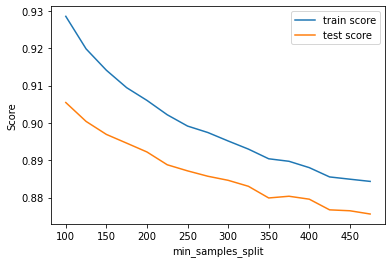

In [167]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="train score")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test score")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.legend()
plt.show()

In [168]:
rf.best_params_

{'min_samples_split': 100}

In [169]:
# model with best params
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model_rf = RandomForestClassifier(bootstrap=True,
                                  class_weight={0:0.08, 1: 0.92},
                                  max_depth=17,
                                  min_samples_leaf=50, 
                                  min_samples_split=100,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [170]:
print(confusion_matrix(y_test,prediction_test))
print(accuracy_score(y_test,prediction_test))
print(classification_report(y_test,prediction_test))

[[6733 1150]
 [ 130  539]]
0.8503274087932647
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7883
           1       0.32      0.81      0.46       669

    accuracy                           0.85      8552
   macro avg       0.65      0.83      0.69      8552
weighted avg       0.93      0.85      0.88      8552



In [171]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, prediction_test, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.81
Specificity: 	0.85


In [172]:
tempresults = pd.DataFrame({'Method':['Random_Forest_Lasso_HyperparameterTuning'], 'Accuracy': 0.88, 
                            'Sensitivity': round(sensitivity, 2), 'Specificity': round(specificity, 2) })
results = pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Sensitivity', 'Specificity']]
results

,Method,Accuracy,Sensitivity,Specificity
0,Log Reg with RFE,0.79,0.78,0.79
0,Log_Reg_PCA,0.79,0.80,0.79
0,Log_Reg_PCA_HyperparamerTuning,0.79,0.79,0.79
0,Decision_Tree_Lasso,0.83,0.68,0.84
0,Decision_Tree_Lasso_HyperparameterTuning,0.86,0.68,0.87
0,Random_Forest_Lasso,0.91,0.56,0.94
0,Random_Forest_Lasso_HyperparameterTuning,0.88,0.81,0.85


In [173]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)

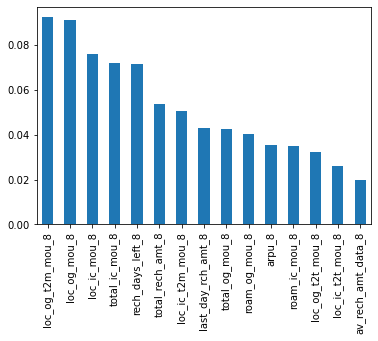

In [174]:
weights.sort_values(ascending=False)[:15].plot(kind='bar')
plt.show()

Conclusions from the above model:  
Model has only 80% Sensitivity. Hence, can conclude that logistic regression with pca and random forest with tuned hyper parameter are giving the best performance.  

### Selecting top features

In [175]:
# creating dataframe
feature_imp = pd.DataFrame({'Features': X.columns, 'Importance': importances})
feature_imp = feature_imp[['Features', 'Importance']]

# sorting features
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
print("Sum of Importance =", feature_imp.Importance.sum())
feature_imp

Sum of Importance = 1.0000000000000002


,Features,Importance
0,loc_og_t2m_mou_8,0.092385
1,loc_og_mou_8,0.091373
2,loc_ic_mou_8,0.076041
3,total_ic_mou_8,0.071904
4,rech_days_left_8,0.071629
5,total_rech_amt_8,0.053811
6,loc_ic_t2m_mou_8,0.050398
7,last_day_rch_amt_8,0.043013
8,total_og_mou_8,0.042685
9,roam_og_mou_8,0.040365


In [176]:
# Retriving top 30 features
top_n = 30
top_features = feature_imp.Features[0:top_n]

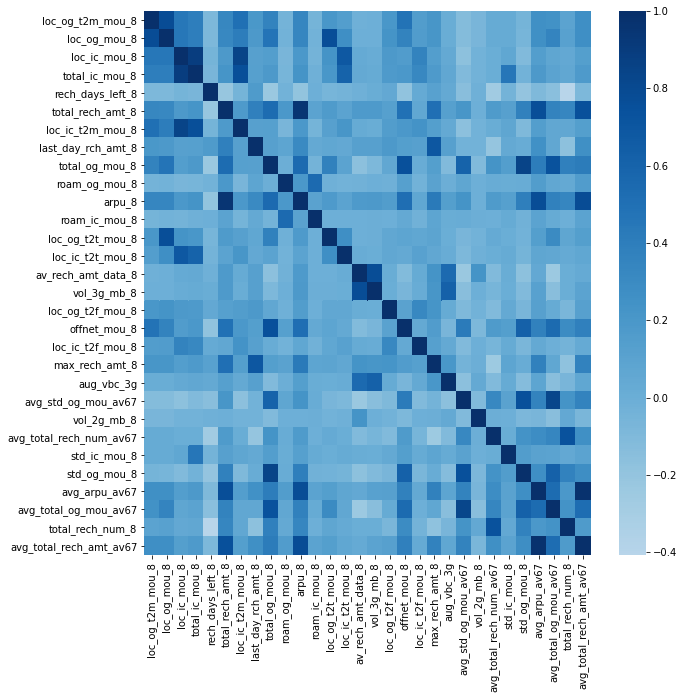

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df[top_features].corr(), center=0.0, cmap='Blues')
plt.show()

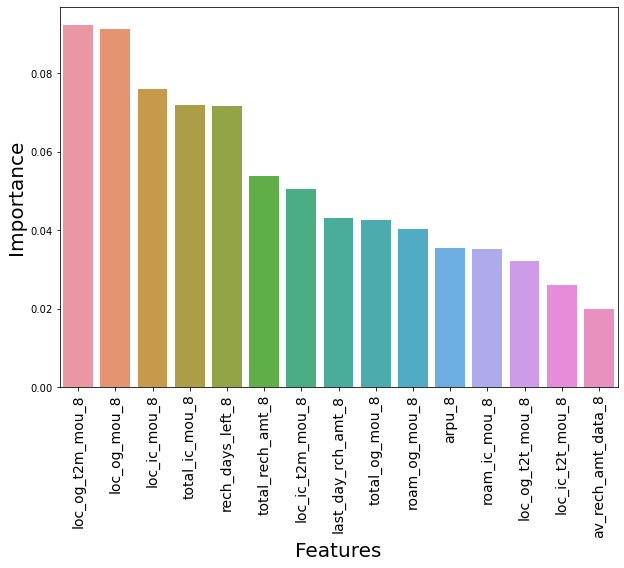

In [178]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Features', y='Importance', data=feature_imp.head(15))
plt.xlabel('Features', size=20)
plt.ylabel('Importance', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

In [179]:
results.reset_index(drop=True).set_index('Method')

,Accuracy,Sensitivity,Specificity
Method,,,
Log Reg with RFE,0.79,0.78,0.79
Log_Reg_PCA,0.79,0.80,0.79
Log_Reg_PCA_HyperparamerTuning,0.79,0.79,0.79
Decision_Tree_Lasso,0.83,0.68,0.84
Decision_Tree_Lasso_HyperparameterTuning,0.86,0.68,0.87
Random_Forest_Lasso,0.91,0.56,0.94
Random_Forest_Lasso_HyperparameterTuning,0.88,0.81,0.85


### Final Analysis and Outcome:   

1. As per evaluation table we can infer that Random Forest with Lasso and Hyperparameter Tuning is giving the best score followed by Logrithmic Regression with PCA.  
2. Based on Lasso regulariation of data for feature selection, couple of key things to look out for are(in order of scores):  
     i. The minutes of usage in the 8th month for both incoming and outgoing calls (including roaming,local,std)  
     ii. The number of recharges in the 8th month and the amount of recharge in the 8th month  
3. Focus on customers who are in between 1-2 years with the operator. These are the customers most likely to churn  
4. Customers who have been with the operator for 5+ years will rarely churn  
5. Telecom company need to focus on customers whose number of recharges and recharge amount decreases steadily in good phase and steeply in action phase   

### Top Predictors or Features:    
  
1. Incoming/Outgoing calls during action phase within/outside network are strong indicators of churn  
2. Number of recharge, recharge amount and average recharge per user during actions phase follows next  
3. List of top 15 predictors are :-   
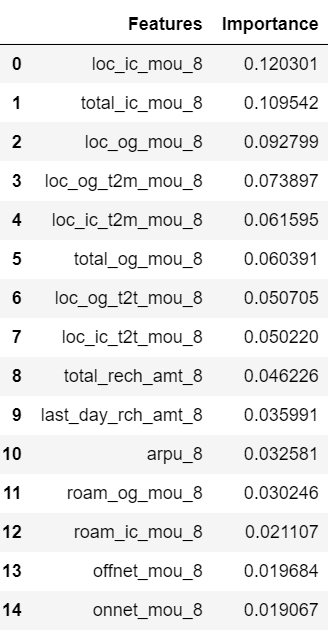  
  
### Recommendation & Conclusions:  
  
1. Being incoming and outgoing calls for month 8 as one of the important predictor telecom company needs to pay attention towards the call rates  
2. Total recharge amount during the month 8 becoming the next important feature company can check the recharge rates as well  
3. Company can also give some discounts or offers to customers whose calls and recharges are getting declined  
4. International travellers also contribute to  be important predictor as incoming & outgoing international roaming customers during month 8 fall in the top 15 predictors. Company may well try to tap this market further.
